# ***`Mini-Project 2: `***
In this Mini-Project, you are ask to apply classification models to the Iris dataset and evaluate their performance using various metrics (accuracy, precision, recall, F1-score, confusion matrix). You will compare at least three classification algorithms of you choice, and write a concise report about your final best model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = '/content/Iris.csv'
iris_data = pd.read_csv(file_path)

iris_data = iris_data.drop(columns=['Id'])

label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        "Classification Report": report,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



Model: Random Forest

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


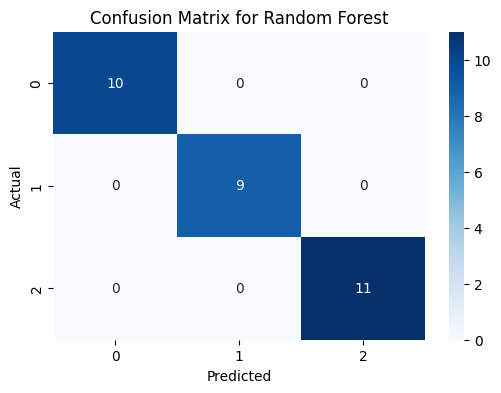


Model: Support Vector Machine

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


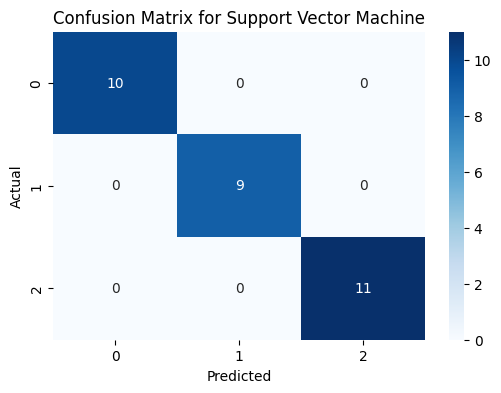


Model: K-Nearest Neighbors

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


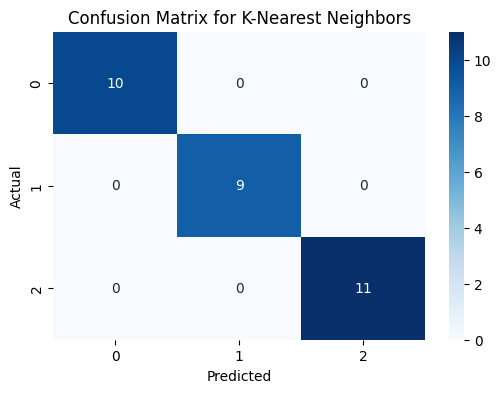

The best performing model is: Random Forest


In [4]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print("\nClassification Report:")
    print(pd.DataFrame(metrics["Classification Report"]).transpose())
    print("\nConfusion Matrix:")
    print(metrics["Confusion Matrix"])

    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

best_model = max(results.items(), key=lambda item: item[1]["Classification Report"]['accuracy'])[0]
print(f"The best performing model is: {best_model}")
